In [174]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from yellowbrick.model_selection import FeatureImportances

In [175]:
count_vectorizer = CountVectorizer()
tfidf_vectorizer = TfidfVectorizer()

In [176]:
data = pd.read_csv('./sampled_events_id.csv', parse_dates=['timestamp'])
data['namespace_num'] = data['namespace'].fillna(-1)
data['length_delta_num'] = data['length_new'] - data['length_old']
data['timestamp2'] = pd.to_datetime(data['timestamp'], unit='s')
data['hour_num'] = data['timestamp2'].dt.hour
data['weekday_num'] = data['timestamp2'].dt.dayofweek
data['comment'] = data['comment'].fillna('no comment')
data['comment_hash_num'] = data['comment'].apply(hash)
data['comment_len_num'] = data['comment'].apply(len)
data['comment_word_num'] = data['comment'].apply(lambda x: len(x.split()))
data['comment_count_vec_num'] = count_vectorizer.fit_transform(data['comment']).sum(axis=1)
data['comment_tfidf_num'] = tfidf_vectorizer.fit_transform(data['comment']).sum(axis=1)

data['title_hash_num'] = data['title'].apply(hash)
data['title_len_num'] = data['title'].apply(len)
data['title_word_num'] = data['title'].apply(lambda x: len(x.split()))
data['title_count_vec_num'] = count_vectorizer.fit_transform(data['title']).sum(axis=1)
data['title_tfidf_num'] = tfidf_vectorizer.fit_transform(data['title']).sum(axis=1)

data['bot_num'] = data['bot'].apply(lambda x : 1 if x == True else 0)  # Extracts the month


<Axes: title={'center': 'True Bots vs Humans Samples'}>

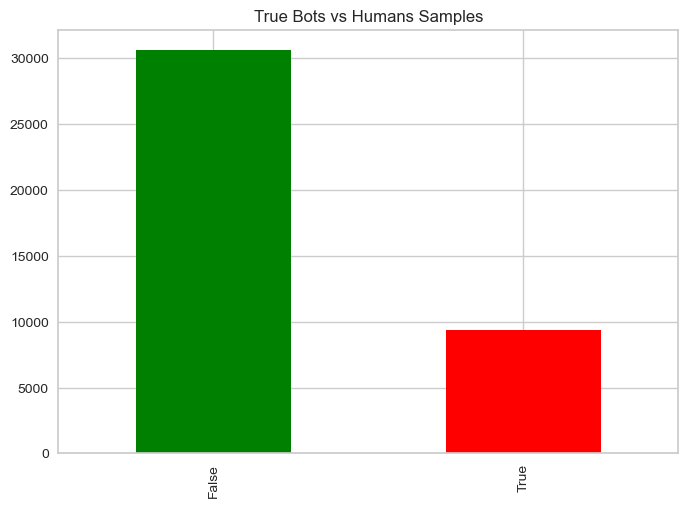

In [194]:
data['bot'].value_counts().plot(kind='bar', title='True Bots vs Humans Samples', color=['green', 'red'])

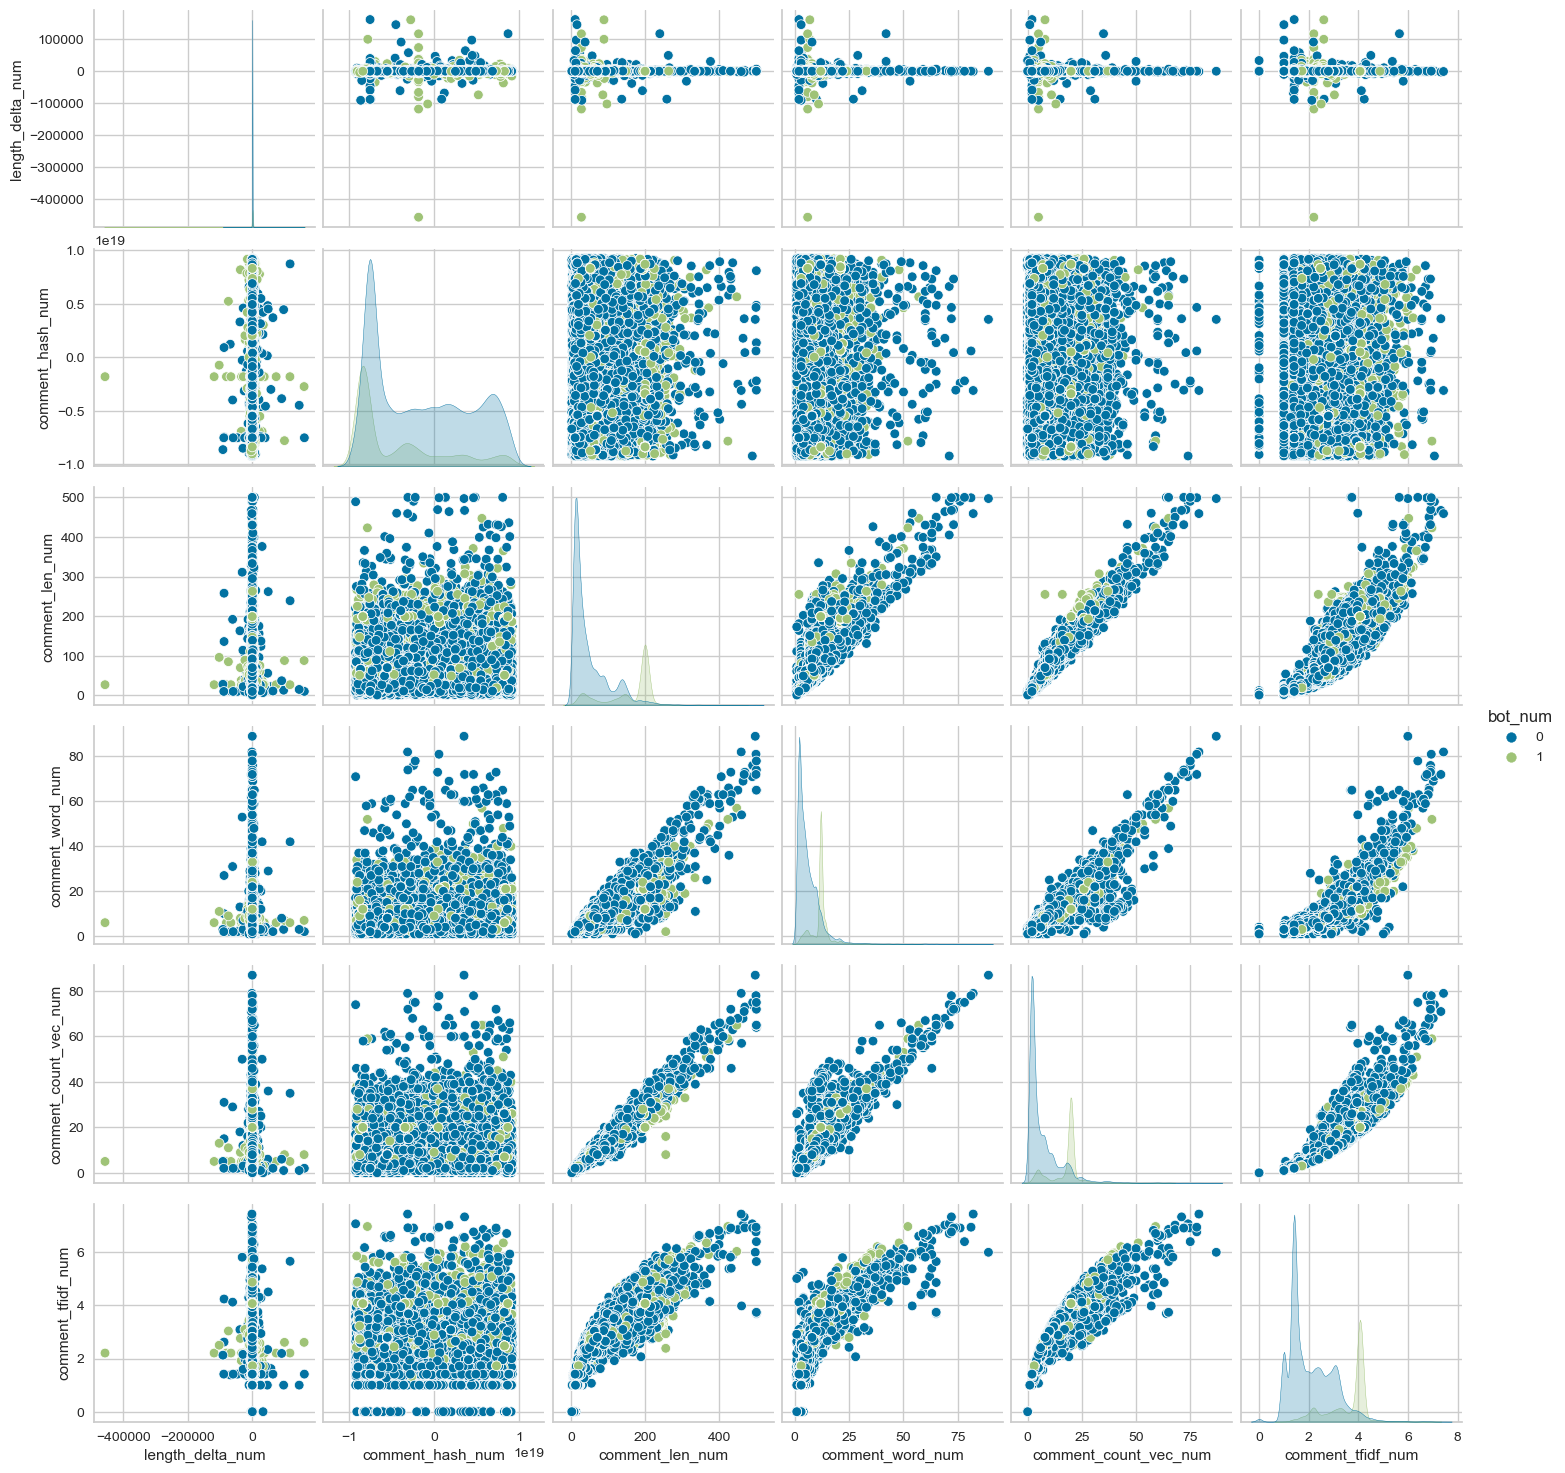

In [178]:
sns.pairplot(data[['length_delta_num','comment_hash_num', 
                   'comment_len_num', 'comment_word_num', 
                   'comment_count_vec_num', 'comment_tfidf_num', 'bot_num']], 
                   hue='bot_num')

In [179]:
X = data[['length_delta_num', 'hour_num', 'weekday_num', 
          'comment_hash_num', 'comment_len_num', 'comment_word_num', 
          'comment_count_vec_num', 'comment_tfidf_num',
          'title_hash_num', 'title_len_num', 'title_word_num',
          'title_count_vec_num', 'title_tfidf_num', 'namespace_num'
          ]]
y = data['bot_num']

In [187]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
print(len(X_train))
print(len(X_test))

32000
8000


In [188]:
clf = RandomForestClassifier(max_depth=10, n_estimators=100,random_state=0)
clf = clf.fit(X_train, y_train)

In [189]:
accuracy = clf.score(X_test, y_test)
print(f"Accuracy: {accuracy*100:.2f}%")

Accuracy: 96.94%


In [183]:
y_pred = clf.predict(X_test)
misclassified_indices = np.where(y_test != y_pred)[0]

len(misclassified_indices)

283

In [184]:
data.iloc[misclassified_indices].where(data['bot'] == True).dropna()

,bot,user,timestamp,namespace,title,comment,length_old,length_new,revision_old,revision_new,...,comment_len_num,comment_word_num,comment_count_vec_num,comment_tfidf_num,title_hash_num,title_len_num,title_word_num,title_count_vec_num,title_tfidf_num,bot_num
68,True,Monkbot,1731083176,0.0,Leschaux,[[User:Monkbot/task 20|Task 20]]: replace {lan...,1771.0,1772.0,1.242144e+09,1.256174e+09,...,199.0,12.0,20.0,4.069342,-4.786806e+18,8.0,1.0,1.0,1.000000,1.0
158,True,JL-Bot,1731083360,4.0,Wikipedia:WikiProject Academic Journals/Journa...,updating Wikipedia citation statistics,48304.0,48018.0,1.252693e+09,1.256174e+09,...,38.0,4.0,4.0,1.921005,-4.242540e+18,71.0,6.0,9.0,2.457136,1.0
173,True,Monkbot,1731083412,0.0,"Magomed Magomedov (footballer, born 1987)",[[User:Monkbot/task 20|Task 20]]: replace {lan...,1630.0,1631.0,1.253282e+09,1.256174e+09,...,199.0,12.0,20.0,4.069342,-8.547350e+18,41.0,5.0,5.0,2.186727,1.0
396,True,JL-Bot,1731083911,4.0,Wikipedia:WikiProject Magazines/Magazines cite...,updating Wikipedia citation statistics,42120.0,42036.0,1.252695e+09,1.256176e+09,...,38.0,4.0,4.0,1.921005,1.562375e+17,63.0,5.0,8.0,2.237578,1.0
412,True,JL-Bot,1731083935,4.0,Wikipedia:WikiProject Magazines/Magazines cite...,updating Wikipedia citation statistics,44355.0,44523.0,1.252695e+09,1.256176e+09,...,38.0,4.0,4.0,1.921005,-2.130626e+18,63.0,5.0,8.0,2.236915,1.0
413,True,Monkbot,1731083946,0.0,Bardo,[[User:Monkbot/task 20|Task 20]]: replace {lan...,24581.0,24582.0,1.245141e+09,1.256176e+09,...,199.0,12.0,20.0,4.069342,-4.976881e+18,5.0,1.0,1.0,1.000000,1.0
456,True,JL-Bot,1731084036,4.0,Wikipedia:WikiProject Magazines/Magazines cite...,updating Wikipedia citation statistics,43811.0,44594.0,1.252695e+09,1.256176e+09,...,38.0,4.0,4.0,1.921005,4.782151e+18,64.0,5.0,8.0,2.236915,1.0
562,True,AnomieBOT,1731084280,4.0,Wikipedia:WikiProject Deletion sorting/Film,[[Wikipedia:WikiProject Deletion sorting/Film/...,3206.0,3088.0,1.256134e+09,1.256177e+09,...,258.0,17.0,28.0,4.422060,-2.511409e+17,43.0,3.0,5.0,2.207123,1.0
883,True,JL-Bot,1731085054,4.0,Wikipedia:WikiProject Academic Journals/Journa...,updating Wikipedia citation statistics,6913.0,7852.0,1.254507e+09,1.256178e+09,...,38.0,4.0,4.0,1.921005,-2.792554e+18,84.0,6.0,10.0,2.652809,1.0
1024,True,MediaWiki message delivery,1731085344,3.0,User talk:DarthWyyrlok,"/* Online meet - November 12, 2024 */ new section",62280.0,63913.0,1.239554e+09,1.256179e+09,...,49.0,10.0,7.0,2.600007,-8.994386e+17,22.0,2.0,3.0,1.472000,1.0


/opt/miniconda3/envs/mmds-env/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


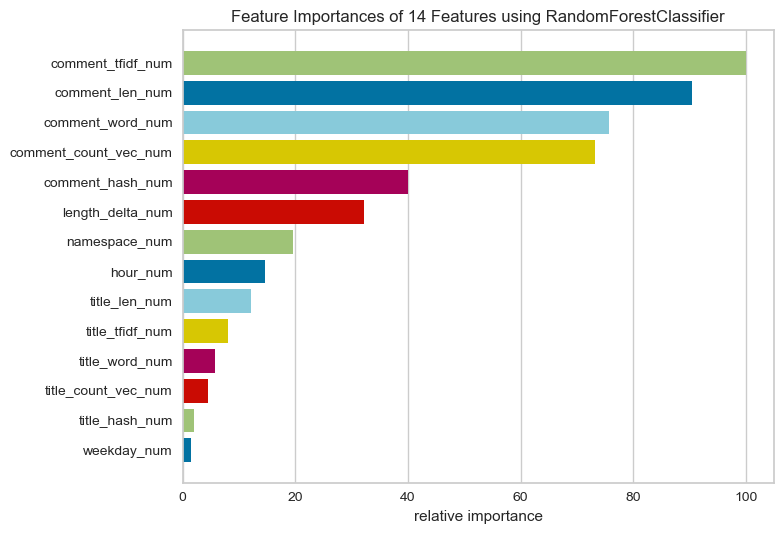

<Axes: title={'center': 'Feature Importances of 14 Features using RandomForestClassifier'}, xlabel='relative importance'>

In [185]:
viz = FeatureImportances(clf)
viz.fit(X_train, y_train)
viz.show()